# How different are blueberries in stores?

<i>Hanna & Denis</i>

Highbush blueberries (berries in this notebook) are a common type of berries often sold in Finnish supermarkets. These berries are grown on the farms, packed and brought to the store by the berry’s provider. The goal of this project is to get insights on how berries are handled. For example, are berries always collected when they reach a certain size? Does the provider distribute berries of the same size to all of the stores? How long does a batch of berries stay in the store? We aim at getting insights on these questions with statistical methods.

We found that berries from the same store on consecutive weeks are drawn from the same distribution. Berries from the same store on not consecutive weeks are from different distributions and berries from different stores are also drawn from different distributions.
It seems that the provider brings berries once in a few weeks to the same store. It also seems that the provider does not only pick berries of the same size.

We bought 4 packs of (berries) from the same provider in 2 supermarkets on different Sundays (2021) (we did not save the expiration date of packs):
* Pack 1 on March 7 from store 1
* Pack 2 on March 14 from store 2
* Pack 3 on March 21 from store 2
* Pack 4 on April 4 from store 1

We measured the diameter of each berry in each pack and saved them into csv files. The goal of this notebook is to find out whether there is a statistically significant difference between diameters of berries from different stores. We use diameters as a measure of berry size. The measurement have been done by the same person with the same ruler.

The outline of the notebook is as follows:
1. [Loading data](#loading)
2. [Investigating data](#investigating)
3. [Checking variances](#variances)
4. [Checking equal mean](#anova)
5. [Pairwise comparisons](#ttest)
6. [Limitations](#limitations)
7. [Conclusion and discussion](#conclusion)

In [1]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

<a id="loading"></a>
## Loading data

In [2]:
week1store1 = pd.read_csv("March7Store1.csv")
week1store1.head()

,diameter
0,1.8
1,1.6
2,1.8
3,1.8
4,1.7


In [3]:
week2store2 = pd.read_csv("March14Store2.csv")
week2store2.head()

,diameter
0,1.70
1,1.60
2,1.70
3,1.30
4,1.45


In [4]:
week3store2 = pd.read_csv("March21Store2.csv")
week3store2.head()

,diameter
0,1.3
1,1.4
2,1.4
3,1.4
4,1.4


In [5]:
week4store1 = pd.read_csv("April4Store1.csv")
week4store1.head()

,diameter
0,1.30
1,1.20
2,1.20
3,1.30
4,1.35


<a id="investigating"></a>
## Investigating data

In [6]:
week1store1.describe()

,diameter
count,65.000000
mean,1.505385
std,0.123150
min,1.200000
25%,1.400000
50%,1.500000
75%,1.600000
max,1.800000


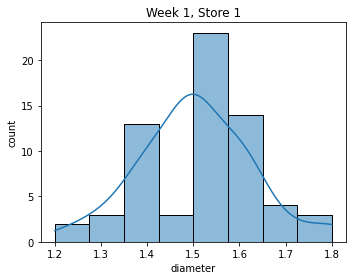

In [7]:
def get_ax():
    plt.subplots(figsize=(5, 4))[1]

def draw_chart(ax, x_label, y_label, title, angle = 0):
    ax.set_xlabel(x_label ,fontsize=10)
    ax.set_ylabel(y_label ,fontsize=10)
    ax.tick_params(labelsize=10)
    ax.set_title(title)
    plt.xticks(rotation=angle)
    plt.tight_layout()
ax = get_ax()
ax = sns.histplot(week1store1.diameter, kde=True, ax=ax)
draw_chart(ax, "diameter", "count", "Week 1, Store 1")

In [8]:
week2store2.describe()

,diameter
count,75.000000
mean,1.413333
std,0.130055
min,1.100000
25%,1.300000
50%,1.400000
75%,1.500000
max,1.700000


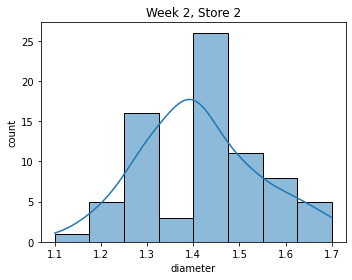

In [9]:
ax = get_ax()
ax = sns.histplot(week2store2.diameter, kde=True, ax=ax)
draw_chart(ax, "diameter", "count", "Week 2, Store 2")

In [10]:
week3store2.describe()

,diameter
count,87.000000
mean,1.378736
std,0.101910
min,1.200000
25%,1.300000
50%,1.400000
75%,1.450000
max,1.600000


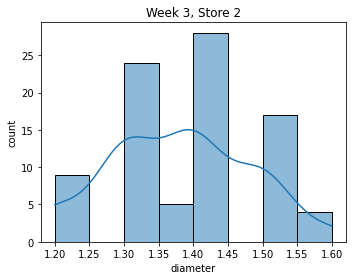

In [11]:
ax = get_ax()
ax = sns.histplot(week3store2.diameter, kde=True, ax=ax)
draw_chart(ax, "diameter", "count", "Week 3, Store 2")

In [12]:
week4store1.describe()

,diameter
count,104.000000
mean,1.260096
std,0.099849
min,1.000000
25%,1.200000
50%,1.300000
75%,1.300000
max,1.500000


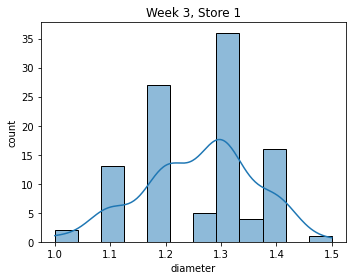

In [13]:
ax = get_ax()
ax = sns.histplot(week4store1.diameter, kde=True, ax=ax)
draw_chart(ax, "diameter", "count", "Week 3, Store 1")

Our samples have slightly different numbers of observations. Each sample’s distribution looks normal. We also assume that berry diameter is distributed normally in each population of berries, as it is a common pattern in nature.

<a id="variances"></a>
## Checking variances
To answer the question, whether all our samples have been taken from populations with the same diameter, we need to run statistical tests. To choose the right tests, we need to find out if populations of our samples have the same variances. For this purpose, we will use Levene's test. The null hypothesis of this test is that all input samples are from populations with equal variances. For this and the following tests, we set our significance level at 0.05. After we have run all the tests in this notebook, we corrected our p-values according to Bonferroni correction, but this correction has not affected our findings.

In [14]:
stats.levene(week1store1.diameter,
               week2store2.diameter,
               week3store2.diameter,
               week4store1.diameter,
               center="mean")

LeveneResult(statistic=1.14980349754199, pvalue=0.3290811702336802)

The p-value is higher than our significance level, which means that we cannot reject the null hypothesis that the variances of samples' populations are equal. This allows us to use t-test and ANOVA test.

<a id="anova"></a>
## Checking equal mean
To check the equality of mean diameters, we will use ANOVA test, which has the following assumptions:
1. Each group sample is drawn from a normally distributed population. <i>We assume that diameter of berries is normally distributed</i>
2. All populations have a common variance. <i>We checked this with Levene's test</i>
3. All samples are drawn independently of each other. <i>We assume that is true for our samples</i>
4. Within each sample, the observations are sampled randomly and independently of each other. <i>We assume that this is also true</i>

Our samples meet all the assumptions of this test. The null hypothesis of ANOVA test is that samples have the same mean.

In [15]:
stats.f_oneway(week1store1.diameter,
               week2store2.diameter,
               week3store2.diameter,
               week4store1.diameter)

F_onewayResult(statistic=68.13396664365565, pvalue=2.9972006778079626e-34)

Based on our significance level, we can reject the null hypothesis that the means are equal. This suggests that at least two samples are drawn from distributions with different mean diameter.

<a id="ttest"></a>
## Pairwise comparisons
To find out which pair of samples has different populations’ diameters, we will compare pairs with t-tests, which have the following assumptions:
1. Equal sample variances
2. Independence of observations
3. The means of samples are distributed normally

Our samples satisfy all the assumptions. The null hypothesis of t-test is that distributions of two samples have the same mean values.

In [16]:
# dataset preparation
datasets = [{"name":"week1store1", "data":week1store1},
            {"name":"week2store2", "data":week2store2},
            {"name":"week3store2", "data":week3store2},
            {"name":"week4store1", "data":week4store1}]

In [17]:
# pairwise comparisons
for i in range(4):
    for j in range(i + 1, 4):
        data1 = datasets[i]
        data2 = datasets[j]
        diameter1 = data1["data"]["diameter"]
        diameter2 = data2["data"]["diameter"]
        print(f'{data1["name"]}(mean: {diameter1.mean():.3f}) vs {data2["name"]}(mean: {diameter2.mean():.3f})')
        print(f"Difference of mean values: {np.abs(diameter1.mean() - diameter2.mean()):.3f}")
        res = stats.ttest_ind(diameter1, diameter2, equal_var=True)
        print("p-value", res[1])
        print("---")

week1store1(mean: 1.505) vs week2store2(mean: 1.413)
Difference of mean values: 0.092
p-value 3.4675860712329753e-05
---
week1store1(mean: 1.505) vs week3store2(mean: 1.379)
Difference of mean values: 0.127
p-value 1.1606727124318234e-10
---
week1store1(mean: 1.505) vs week4store1(mean: 1.260)
Difference of mean values: 0.245
p-value 1.7672349308360325e-30
---
week2store2(mean: 1.413) vs week3store2(mean: 1.379)
Difference of mean values: 0.035
p-value 0.05970146487707474
---
week2store2(mean: 1.413) vs week4store1(mean: 1.260)
Difference of mean values: 0.153
p-value 5.89157936281648e-16
---
week3store2(mean: 1.379) vs week4store1(mean: 1.260)
Difference of mean values: 0.119
p-value 6.574354838902983e-14
---


Based on test results, we have enough evidence to reject the null hypothesis for all of the pairs except for the samples bought on consecutive weeks from store 2 (week2store2 vs week3store2).

<a id="limitations"></a>
## Limitations

This study has a number of limitations. For example, we examined berry diameters only within a limited timeframe. The same study conducted in a different timeframe might result in different conclusions. We also measured only 4 samples of berries and measured only diameters of berries. Other samples and berry parameters might change the conclusions. 

<a id="conclusion"></a>
## Conclusion and discussion
Our results suggest that only berries bought on consecutive weeks from store 2 seem to be drawn from the same population. Samples of berries bought on non-consecutive weeks or from different stores are drawn from different populations.

In this paragraph, we speculate what might cause the observed results. It seems that the berry provider distributes berries from different populations to different stores. It also seems that the stores either keep the same berries for up to two weeks or the provider brings berries from the same population to the same store for up to two weeks. Our idea that berries are collected only when they reach a certain size does not seem to hold.
